## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [51]:
import os
import keras
from keras.regularizers import l1, l2, l1_l2

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [52]:
train, test = keras.datasets.cifar10.load_data()

In [53]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [54]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [55]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    """Code Here
    建立神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = n_units, 
                                   activation = 'relu', 
                                   name = 'hidden_layer'+str(i+1), 
                                   kernel_regularizer = l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units = n_units, 
                                   activation = 'relu', 
                                   name = 'hidden_layer'+str(i+1), 
                                   kernel_regularizer = l1(l1_ratio))(x)
        
    output_layer = keras.layers.Dense(units = output_units, activation = "softmax", name = "output")(x)
    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
    return model

def build_mlp2(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2_ratio=1e-4):
    """Code Here
    建立神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = n_units, 
                                   activation = 'relu', 
                                   name = 'hidden_layer'+str(i+1), 
                                   kernel_regularizer = l1_l2(l1_l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units = n_units, 
                                   activation = 'relu', 
                                   name = 'hidden_layer'+str(i+1), 
                                   kernel_regularizer = l1_l2(l1_l2_ratio))(x)
        
    output_layer = keras.layers.Dense(units = output_units, activation = "softmax", name = "output")(x)
    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
    return model

In [56]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]
L1_L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [57]:
# L1 regularization
results = {}
"""Code Here
撰寫訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [====

50000/50000 [==============================] - 6s 124us/step - loss: 2.4626 - accuracy: 0.0981 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 6s 125us/step - loss: 2.4626 - accuracy: 0.0950 - val_loss: 2.4627 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.4626 - accuracy: 0.0973 - val_loss: 2.4628 - val_accuracy: 0.1000
Experiment with Regulizer = 0.000100
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________

Epoch 46/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.7956 - accuracy: 0.6172 - val_loss: 3.0157 - val_accuracy: 0.5330
Epoch 47/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.7536 - accuracy: 0.6209 - val_loss: 2.9814 - val_accuracy: 0.5345
Epoch 48/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.7208 - accuracy: 0.6176 - val_loss: 2.9419 - val_accuracy: 0.5395
Epoch 49/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.6810 - accuracy: 0.6222 - val_loss: 3.0372 - val_accuracy: 0.4961
Epoch 50/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.6441 - accuracy: 0.6244 - val_loss: 2.8726 - val_accuracy: 0.5361
Experiment with Regulizer = 0.000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
___

50000/50000 [==============================] - 6s 120us/step - loss: 0.9492 - accuracy: 0.6670 - val_loss: 1.4012 - val_accuracy: 0.5191
Epoch 44/50
50000/50000 [==============================] - 6s 127us/step - loss: 0.9417 - accuracy: 0.6700 - val_loss: 1.3877 - val_accuracy: 0.5279
Epoch 45/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.9297 - accuracy: 0.6737 - val_loss: 1.3953 - val_accuracy: 0.5254
Epoch 46/50
50000/50000 [==============================] - 6s 120us/step - loss: 0.9174 - accuracy: 0.6778 - val_loss: 1.3945 - val_accuracy: 0.5267
Epoch 47/50
50000/50000 [==============================] - 6s 127us/step - loss: 0.9086 - accuracy: 0.6827 - val_loss: 1.6678 - val_accuracy: 0.4709
Epoch 48/50
50000/50000 [==============================] - 6s 120us/step - loss: 0.8943 - accuracy: 0.6852 - val_loss: 1.4503 - val_accuracy: 0.5210
Epoch 49/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.8784 - accuracy: 0.6922 - val_loss:

50000/50000 [==============================] - 6s 121us/step - loss: 0.9900 - accuracy: 0.6525 - val_loss: 1.3682 - val_accuracy: 0.5281
Epoch 41/50
50000/50000 [==============================] - 6s 120us/step - loss: 0.9775 - accuracy: 0.6589 - val_loss: 1.3793 - val_accuracy: 0.5280
Epoch 42/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.9640 - accuracy: 0.6613 - val_loss: 1.3440 - val_accuracy: 0.5389
Epoch 43/50
50000/50000 [==============================] - 6s 128us/step - loss: 0.9542 - accuracy: 0.6660 - val_loss: 1.4313 - val_accuracy: 0.5131
Epoch 44/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.9401 - accuracy: 0.6717 - val_loss: 1.3731 - val_accuracy: 0.5283
Epoch 45/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.9295 - accuracy: 0.6736 - val_loss: 1.3997 - val_accuracy: 0.5273
Epoch 46/50
50000/50000 [==============================] - 6s 122us/step - loss: 0.9174 - accuracy: 0.6759 - val_loss:

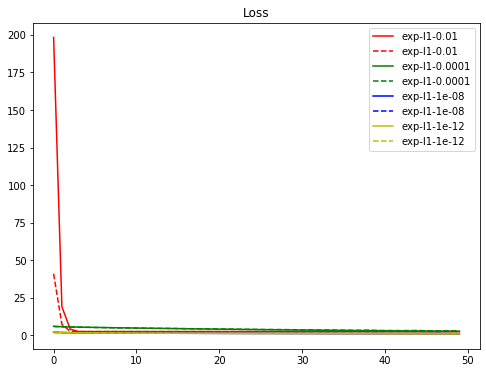

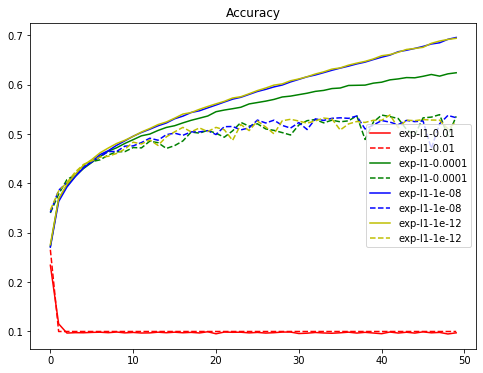

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [59]:
# L1_L2 regularization
results2 = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp2(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l1_l2-%s" % str(regulizer_ratio)
    results2[exp_name_tag] = {'train-loss': train_loss,
                              'valid-loss': valid_loss,
                              'train-acc': train_acc,
                              'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [====

50000/50000 [==============================] - 6s 129us/step - loss: 2.4614 - accuracy: 0.0978 - val_loss: 2.4614 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.4614 - accuracy: 0.0971 - val_loss: 2.4615 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 7s 146us/step - loss: 2.4614 - accuracy: 0.0981 - val_loss: 2.4614 - val_accuracy: 0.1000
Experiment with Regulizer = 0.000100
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________

50000/50000 [==============================] - 7s 134us/step - loss: 1.7659 - accuracy: 0.4761 - val_loss: 1.7800 - val_accuracy: 0.4749
Epoch 46/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.7611 - accuracy: 0.4766 - val_loss: 1.8232 - val_accuracy: 0.4437
Epoch 47/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.7585 - accuracy: 0.4784 - val_loss: 1.7955 - val_accuracy: 0.4603
Epoch 48/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.7554 - accuracy: 0.4786 - val_loss: 1.7758 - val_accuracy: 0.4654
Epoch 49/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.7491 - accuracy: 0.4797 - val_loss: 1.8003 - val_accuracy: 0.4560
Epoch 50/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.7466 - accuracy: 0.4819 - val_loss: 1.8025 - val_accuracy: 0.4632
Experiment with Regulizer = 0.000000
Model: "model_1"
________________________________________________________________

50000/50000 [==============================] - 7s 136us/step - loss: 1.6494 - accuracy: 0.5128 - val_loss: 1.7524 - val_accuracy: 0.4735
Epoch 43/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.6409 - accuracy: 0.5147 - val_loss: 1.7234 - val_accuracy: 0.4832
Epoch 44/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.6366 - accuracy: 0.5154 - val_loss: 1.7819 - val_accuracy: 0.4482
Epoch 45/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.6330 - accuracy: 0.5135 - val_loss: 1.7452 - val_accuracy: 0.4889
Epoch 46/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.6270 - accuracy: 0.5175 - val_loss: 1.7206 - val_accuracy: 0.4867
Epoch 47/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.6237 - accuracy: 0.5188 - val_loss: 1.6932 - val_accuracy: 0.4931
Epoch 48/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.6195 - accuracy: 0.5211 - val_loss:

50000/50000 [==============================] - 8s 150us/step - loss: 1.6695 - accuracy: 0.5101 - val_loss: 1.7091 - val_accuracy: 0.4985
Epoch 40/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.6603 - accuracy: 0.5100 - val_loss: 1.6909 - val_accuracy: 0.4999
Epoch 41/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.6537 - accuracy: 0.5108 - val_loss: 1.7059 - val_accuracy: 0.4944
Epoch 42/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.6461 - accuracy: 0.5146 - val_loss: 1.7076 - val_accuracy: 0.4884
Epoch 43/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.6408 - accuracy: 0.5152 - val_loss: 1.7394 - val_accuracy: 0.4853
Epoch 44/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.6357 - accuracy: 0.5176 - val_loss: 1.6789 - val_accuracy: 0.5037
Epoch 45/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.6306 - accuracy: 0.5174 - val_loss:

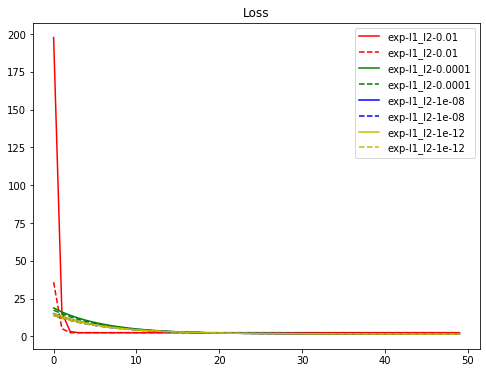

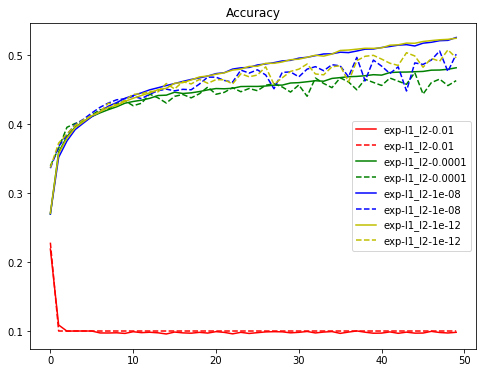

In [60]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train-loss'])),results2[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid-loss'])),results2[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train-acc'])),results2[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid-acc'])),results2[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()